[Table of Contents](table_of_contents.ipynb)

# Topic 12.  Linear Operators
Author: Christopher Whetten, <chris.whetten@gmail.com> (2020)

Author: Michael Eyler, <eyler94@gmail.com> (2018)
    

##  Introduction

The term "Linear Operator" is a ubiquitous idea that is used widely in mathematics. Often it is used to refer to matrices (used in linear algebra), but the idea of an operator or transformation is far more general. Most traditional mathematical operations can be cast as an operator of some kind. Understanding these operators can be key to solving difficult problems that arise in many engineering applications. 

In this section we describe Linear Operators and some of the key concepts surrounding them. We also give some numerical examples and simple exercises that can be used to improve the readers understanding of this concept.

## Explanation

### Transformations

We start by introducing notion and the notation for a general transformation. We say that $L$ is a transformation that operates on an element of the vector space $X$ and transforms it to an element of the vector space $Y$. This is generally written as:

$L: X \rightarrow Y$

These transformations are frequently also called opearators or mappings though these names can mean slightly different things depending on the field. Recall that a vector space is equipped with a specific scalar field (usually either the real numbers $\mathbb{R}$ or the complex numbers $\mathbb{C}$). In order for this transformation to be valid both $X$ and $Y$ must share the same scalar field. 

Example: Perhaps the most familiar concept that can be cast as a transformation is a simple function of $x$. We could define the function $f(x) = x^2$ where we define $x\in\mathbb{R}$ where $\mathbb{R}$ is a vector space with real scalars and this transformation is written as: $f: \mathbb{R} \rightarrow \mathbb{R}$. Similarly $f(x,y,z) = xyz$ could be represented as $f: \mathbb{R}^3 \rightarrow \mathbb{R}$.

### Linear Opeartors (Linear Transformations)

While transforamtions are a useful concept, we can further refine this definition to create a subclass with certain desirable properties. We say that a transformation $L$ is *linear* if it obeys the following rule for $x,y\in X$ and scalars $\alpha, \beta$:

$L(\alpha x + \beta y) = \alpha L(x) + \beta L(y)$ 

Which is sometimes broken out as:

$L(\alpha x) = \alpha L(x)$

$L(x + y) = L(x) + L(y)$

Example: To see why this distiction is important, consider the previous example where we had a transformation $f(x) = x^2$. Let $x = z + y; x,z,y\in\mathbb{R}$ and it becomes clear that $f(x) = f(y+z) \neq f(z) + f(y)$. Similarly if $x=\alpha y$, $f(x) = f(\alpha y ) \neq \alpha f(y)$. While we can still solve this equation in most cases, consider a similar nonlinear transformation $f:\mathbb{R}^n \rightarrow \mathbb{R}$ defined as $f(\mathbf{x}) = \mathbf{x} \cdot \mathbf{x}$. For any real value result in $Y$ this function has an infinite number of solutions. If we can restrict tranformations or operators to linear cases, our tools for solving them become much more robust.

If $L$ is a linear transformation, and $L : X \rightarrow X $ then we say that $L$ is an *endomorphism*. 




### Simple Numerical Examples

Following are some examples of linear operators acting on matricies and functions. 

The first solution of each example demonstrates that you can move a scalar outside the operand without impacting the result.

The second solution of each example shows that the outcome of combined operands is the same as the combined outputs of the individual operands.

In [8]:
import numpy as np

#Matrix example of linear operators

A = np.array([[1,2],[3,4]]) #Linear operator: A
B = np.array([[5,6],[7,8]]) #Operand: B
beta = 3 #Constant: beta
print("Notice that A[B]*beta is the same as A[B*beta].")
print("\nA[B]*beta:\n\n", A*B*beta)
C = B*beta
print("\nA[B*beta]:\n\n", A*C)
D = np.array([[10,11],[12,13]])
gamma = 5
E = D*gamma #Operand D*gamma
print("\nNotice also that A[B*beta]+A[D*gamma] is the same as A[B*beta+D*gamma].")
print("\nA[B*beta]+A[D*gamma]:\n\n", A*C+A*E)
print("\nA[B*beta+D*gamma]:\n\n", A*(C+E))




Notice that A[B]*beta is the same as A[B*beta].

A[B]*beta:

 [[15 36]
 [63 96]]

A[B*beta]:

 [[15 36]
 [63 96]]

Notice also that A[B*beta]+A[D*gamma] is the same as A[B*beta+D*gamma].

A[B*beta]+A[D*gamma]:

 [[ 65 146]
 [243 356]]

A[B*beta+D*gamma]:

 [[ 65 146]
 [243 356]]


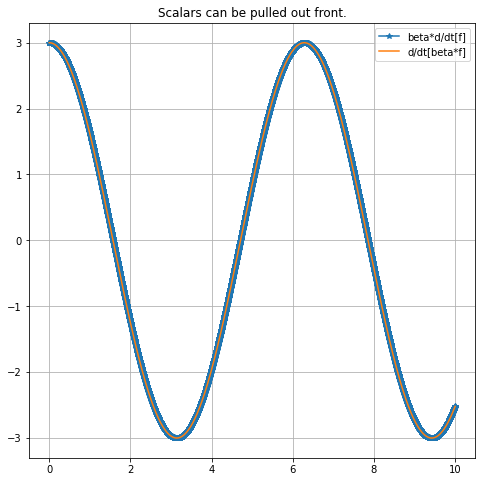

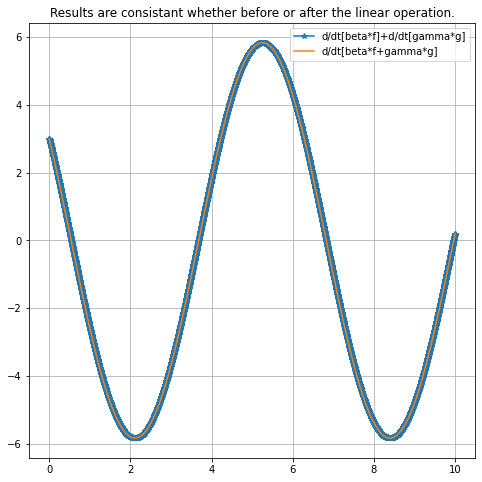

In [4]:
###Numerical differentation example
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
beta = 3 #Constant: beta

def deriv(func, ts):
    n = np.size(func)
    d_func = np.zeros(n-1)
    for i in range(0,np.size(d_func)):
        d_func[i] = (func[i+1]-func[i])/ts
    return d_func

ts = 0.001
t = np.arange(0,10,ts)
f = np.sin(t)
g = np.cos(t)

d_f = beta*deriv(f,ts)
d_f_b = deriv(beta*f,ts)

plt.figure(figsize=(8,8))
plt.plot(t[0:-1],d_f,'-*')
plt.plot(t[0:-1],d_f_b)
plt.title("Scalars can be pulled out front.")
plt.legend(['beta*d/dt[f]','d/dt[beta*f]'])
plt.grid()
plt.show()

d_f_g_out = deriv(gamma*g,ts)+deriv(beta*f,ts)
d_f_g_in = deriv((gamma*g+beta*f),ts)

plt.figure(figsize=(8,8))
plt.plot(t[0:-1],d_f_g_out,'-*')
plt.plot(t[0:-1],d_f_g_in)
plt.title("Results are consistant whether before or after the linear operation.")
plt.legend(['d/dt[beta*f]+d/dt[gamma*g]','d/dt[beta*f+gamma*g]'])
plt.grid()
plt.show()

## Range and Nullspace of an Operator

We define two critical properties of operators: range and nullspace. Often these ideas are used together to understand how an operator behaves on its spaces $X$ and $Y$ and its solution characteristics.

### Range of an operator

The range $R(L)$ of an operator $L: X \rightarrow Y$ describes a subspace of $Y$ that can be reached through the application of $L$. In other words $R(L) \subseteq Y$. Note that range and nullspace are not unique to linear operators, every operator has a range and a nullspace.

Example: Consider the norm of a vector. In general, this is not a linear operator, as the length of two vectors added together is not the same as each individually (think triangle inequality). The range of this operator is all real positive numbers $\geq 0$. This forms a subspace of the whole real line. 

It is often intuitive to consider the range of a matrix. We call the dimension of the range of a matrix the *rank* of a matrix.

Example: Consider the matrix

$\begin{pmatrix}
1 & 2 & 5\\
0 & 1 & 0
\end{pmatrix}$

To find the range we multiply by an aribtrary vector in $\mathbb{R}^2$ 


$\begin{pmatrix}
1 & 2 \\
3 & 6 \\
1 & 2
\end{pmatrix} \begin{pmatrix}
a \\b
\end{pmatrix} = \begin{pmatrix}
    a + 2b \\ 3a + 6b \\ a + 2b \end{pmatrix} = (a + 2b) \begin{pmatrix}
    1 \\ 3 \\ 1 \end{pmatrix} $
Therefore the range of this matrix is a scaled value of the vector $\begin{pmatrix}
    1 \\ 3 \\ 1 \end{pmatrix} $ which is a line with dimension of 1. Therefore the rank of this matrix is 1. In other words this transformation takes vectors in $\mathbb{R}^2$ and produces a value on a line. Can you see how rank is related to linear independence?
    
### Nullspace of an operator
    
The nullspace of an operator $L$ is the subspace of $X$ for which the application of $L$ produces the $\mathbf{0}$ element of $Y$. In other words, every member $x$ where $x \in X$ for which $Lx = \mathbf{0}$ is in the nullspace of $L$. We denote the nullspace by $N(L)$ and often call this the *kernel* of the operator. 

Example: We want to find the nullspace of the matrix from the previous example. We do this by solving for vectors in $X$ that produce the $\mathbf{0}$ vector

$\begin{pmatrix}
1 & 2 \\
3 & 6 \\
1 & 2
\end{pmatrix} \begin{pmatrix}
a \\b
\end{pmatrix} = \begin{pmatrix}
    0 \\ 0 \\ 0 \end{pmatrix}$
    
$ 
\begin{equation}
    \begin{split}
   \\ 
   a + 2b = 0 \\
   3a + 6b = 0 \\
   a + 2b = 0
    \end{split}
\end{equation}$

which clearly indicates
$a = -2b$ so any $\alpha \begin{pmatrix}
-2 \\1
\end{pmatrix}$ is in the nullspace. This nullspace has dimension 1.

A theorem that can be helpful for understanding the range and nullspace is as follows:
For finite dimensional vector spaces $X, Y$ and a linear transformation $L: X \rightarrow Y$, $dim(X) = dim(R(L)) + dim(N(L))$. This is sometimes called the dimension theorem and shows the relationship between these two subspaces and their relation to $X$. 

We'll learn more about why the range and nullspace are meaningful but for now, consider the problem where you are trying to solve the problem $L(x) = y$ where $y$ is known and $x$ is desired. What happens if the $N(L) \neq 0$? If $y=0$ then no solution exists since there are multiple elements in $X$ that map to 0. What happens if $R(L) \neq Y$? That means there are elements of $Y$ that can never be obtained by any element of $X$. We call these problems invertible and in general no solution exists! Invertibility of operators will be discussed later.

## An Engineering Application

One engineering application includes modeling dynamic systems and their response to applied forces. This is commonly done with transfer functions. Linear Time Invariant systems are in fact linear operators on the force. Transforming a force into a reaction (that reaction could be motion, energy, or some combination.)

The following example is of a mass that has a spring and damper restraining it. It is taken from Dr. Randall Beard and Dr. Tim McClain's book, Introduction to Feedback Control Using Design Studies, and modified slightly to work on this Jupyter project.

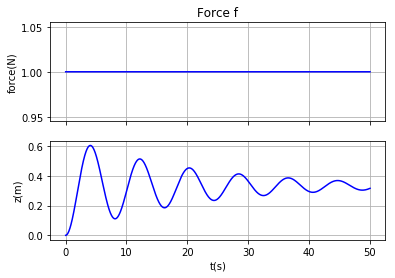

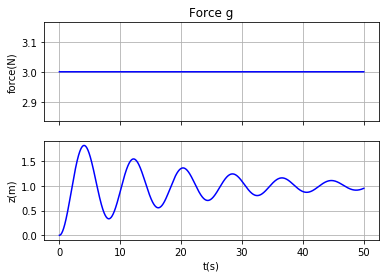

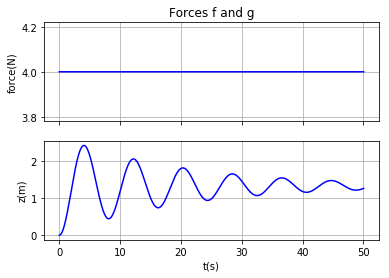

In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import random


# Mass Parameters
class P:
    def __init__(self):
        # Physical parameters of the mass known to the controller
        self.m = 5.0  # mass kg
        self.k = 3.0  # spring constant Kg/s^2
        self.b = 0.5  # damping coefficient Kg/s

        # parameters for animation
        self.length = 5.0
        self.width = 1.0

        # Initial Conditions
        self.z0 = 0.0  # initial position of mass, m
        self.zdot0 = 0.0  # initial velocity of mass m/s

        # Simulation Parameters
        self.t_start = 0.0  # Start time of simulation
        self.t_end = 50.0  # End time of simulation
        self.Ts = 0.01  # sample time for simulation
        self.t_plot = 0.1  # the plotting and animation is updated at this rate

        # dirty derivative parameters
        self.sigma = 0.05  # cutoff freq for dirty derivative
        self.beta = (2.0*sigma-Ts)/(2.0*sigma+Ts)  # dirty derivative gain

        # saturation limits
        self.F_max = 2.0  # Max force, N

# Plotting

plt.ion()  # enable interactive drawing


class plotData:
    ''' 
        This class plots the time histories for the mass data.
    '''

    def __init__(self,title):
        # Number of subplots = num_of_rows*num_of_cols
        self.num_rows = 2    # Number of subplot rows
        self.num_cols = 1    # Number of subplot columns

        # Crete figure and axes handles
        self.fig, self.ax = plt.subplots(self.num_rows, self.num_cols, sharex=True)

        # Instantiate lists to hold the time and data histories
        self.time_history = []  # time
        self.z_history = []  # position z
        self.force_history = []  # control force

        # create a handle for every subplot.
        self.handle = []
        self.handle.append(myPlot(self.ax[0], ylabel='force(N)', title=title))
        self.handle.append(myPlot(self.ax[1], xlabel='t(s)', ylabel='z(m)'))#'Mass Data'))

    def updatePlots(self, t, states, ctrl):
        '''
            Add to the time and data histories, and update the plots.
        '''
        # update the time history of all plot variables
        self.time_history.append(t)  # time
        self.z_history.append(states[0])  # mass position
        self.force_history.append(ctrl)  # force on the base

        # update the plots with associated histories
        self.handle[0].updatePlot(self.time_history, [self.force_history])
        self.handle[1].updatePlot(self.time_history, [self.z_history])


class myPlot:
    ''' 
        Create each individual subplot.
    '''
    def __init__(self, ax,
                 xlabel='',
                 ylabel='',
                 title='',
                 legend=None):
        ''' 
            ax - This is a handle to the  axes of the figure
            xlable - Label of the x-axis
            ylable - Label of the y-axis
            title - Plot title
            legend - A tuple of strings that identify the data. 
                     EX: ("data1","data2", ... , "dataN")
        '''
        self.legend = legend
        self.ax = ax                  # Axes handle
        self.colors = ['b', 'g', 'r', 'c', 'm', 'y', 'b']
        # A list of colors. The first color in the list corresponds
        # to the first line object, etc.
        # 'b' - blue, 'g' - green, 'r' - red, 'c' - cyan, 'm' - magenta
        # 'y' - yellow, 'k' - black
        self.line_styles = ['-', '-', '--', '-.', ':']
        # A list of line styles.  The first line style in the list
        # corresponds to the first line object.
        # '-' solid, '--' dashed, '-.' dash_dot, ':' dotted

        self.line = []

        # Configure the axes
        self.ax.set_ylabel(ylabel)
        self.ax.set_xlabel(xlabel)
        self.ax.set_title(title)
        self.ax.grid(True)

        # Keeps track of initialization
        self.init = True   

    def updatePlot(self, time, data):
        ''' 
            Adds data to the plot.  
            time is a list, 
            data is a list of lists, each list corresponding to a line on the plot
        '''
        if self.init == True:  # Initialize the plot the first time routine is called
            for i in range(len(data)):
                # Instantiate line object and add it to the axes
                self.line.append(Line2D(time,
                                        data[i],
                                        color=self.colors[np.mod(i, len(self.colors) - 1)],
                                        ls=self.line_styles[np.mod(i, len(self.line_styles) - 1)],
                                        label=self.legend if self.legend != None else None))
                self.ax.add_line(self.line[i])
            self.init = False
            # add legend if one is specified
            if self.legend != None:
                plt.legend(handles=self.line)
        else: # Add new data to the plot
            # Updates the x and y data of each line.
            for i in range(len(self.line)):
                self.line[i].set_xdata(time)
                self.line[i].set_ydata(data[i])

        # Adjusts the axis to fit all of the data
        self.ax.relim()
        self.ax.autoscale()

# Mass Dynamics

class massDynamics:
    '''
        Model the physical system
    '''

    def __init__(self):
        # Initial state conditions
        self.state = np.matrix([[P.z0],      # initial mass position
                                [P.zdot0]])  # initial mass velocity
        #################################################
        # The parameters for any physical system are never known exactly.  Feedback
        # systems need to be designed to be robust to this uncertainty.  In the simulation
        # we model uncertainty by changing the physical parameters by a uniform random variable
        # that represents alpha*100 % of the parameter, i.e., alpha = 0.2, means that the parameter
        # may change by up to 20%.  A different parameter value is chosen every time the simulation
        # is run.
        alpha = 0  # Uncertainty parameter
        self.m = P.m * (1+2*alpha*np.random.rand()-alpha)  # Mass, kg
        self.k = P.k * (1+2*alpha*np.random.rand()-alpha)  # spring constant, m
        self.b = P.b * (1+2*alpha*np.random.rand()-alpha)  # Damping coefficient, Ns
        self.Ts = P.Ts  # sample rate at which the dynamics are propagated

    def propagateDynamics(self, u):
        '''
            Integrate the differential equations defining dynamics
            P.Ts is the time step between function calls.
            u contains the system input(s).
        '''
        # Integrate ODE using Runge-Kutta RK4 algorithm
        k1 = self.derivatives(self.state, u)
        k2 = self.derivatives(self.state + self.Ts/2*k1, u)
        k3 = self.derivatives(self.state + self.Ts/2*k2, u)
        k4 = self.derivatives(self.state + self.Ts*k3, u)
        self.state += self.Ts/6 * (k1 + 2*k2 + 2*k3 + k4)

    def derivatives(self, state, u):
        '''
            Return xdot = f(x,u), the derivatives of the continuous states, as a matrix
        '''
        # re-label states and inputs for readability
        z = state.item(0)
        zdot = state.item(1)
        force = u
        # The equations of motion.
        zddot = (force - self.b*zdot - self.k*z)/self.m

        # build xdot and return
        xdot = np.matrix([[zdot], [zddot]])
        return xdot

    def outputs(self):
        '''
            Returns the measured outputs as a list
            [z] with added Gaussian noise
        '''
        # re-label states for readability
        z = self.state.item(0)
        # add Gaussian noise to outputs
        z_m = z + random.gauss(0, 0.001)
        # return measured outputs
        return [z_m]

    def states(self):
        '''
            Returns all current states as a list
        '''
        return self.state.T.tolist()[0]

    
# instantiate parameters, mass, controller, and reference classes
P = P()

mass_f = massDynamics()
mass_g = massDynamics()
mass_f_g = massDynamics()

# instantiate the simulation plots and animation
dataPlot_f = plotData("Force f")
dataPlot_g = plotData("Force g")
dataPlot_f_g = plotData("Forces f and g")

t = P.t_start  # time starts at t_start
while t < P.t_end:  # main simulation loop
    # Propagate dynamics in between plot samples
    t_next_plot = t + P.t_plot
    while t < t_next_plot:  # updates control and dynamics at faster simulation rate
        f=1
        g=3
        mass_f.propagateDynamics(f)  # Propagate the dynamics
        mass_g.propagateDynamics(g)  # Propagate the dynamics
        mass_f_g.propagateDynamics(f+g)  # Propagate the dynamics
        t = t + P.Ts  # advance time by Ts
    # update animation and data plots
        dataPlot_f.updatePlots(t, mass_f.states(), f)
        dataPlot_g.updatePlots(t, mass_g.states(), g)
        dataPlot_f_g.updatePlots(t, mass_f_g.states(), f+g)


Notice how the force f (1 N) and the force g (3 N) can be placed on the system separately and their outputs summed are equal to the forced being applied to the system together.

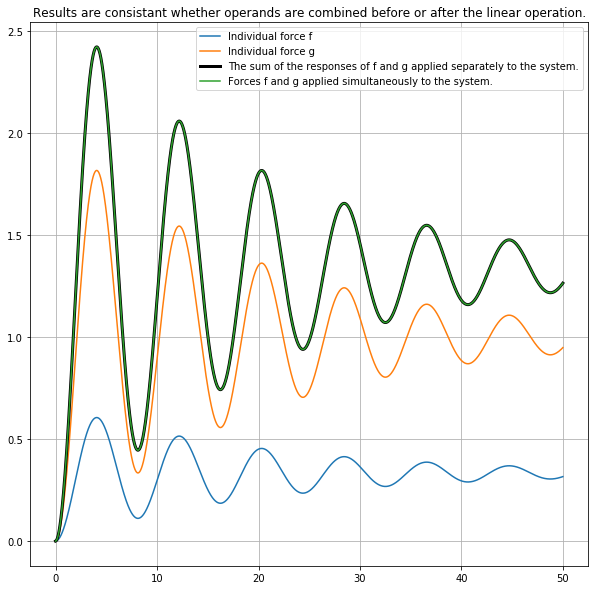

In [12]:
plt.figure(figsize=(10,10))
f_g = np.zeros(5000)
for i in range(5000):
    f_g[i] = dataPlot_f.z_history[i]+dataPlot_g.z_history[i]

plt.plot(np.arange(P.t_start,P.t_end,P.Ts),dataPlot_f.z_history[:-3])
plt.plot(np.arange(P.t_start,P.t_end,P.Ts),dataPlot_g.z_history[:-3])
plt.plot(np.arange(P.t_start,P.t_end,P.Ts),f_g,'k',linewidth=3)
plt.plot(np.arange(P.t_start,P.t_end,P.Ts),dataPlot_f_g.z_history[:-3])

plt.title("Results are consistant whether operands are combined before or after the linear operation.")
plt.legend(['Individual force f',
            'Individual force g',
            'The sum of the responses of f and g applied separately to the system.',
            'Forces f and g applied simultaneously to the system.'])
plt.grid()
plt.show()


## Exercises

1. Is every matrix operator a linear operator? Show why or why not.
2. Is the absolute value a linear opeartor? If not, what could be done to make it a linear operator?
3. Give 3 distinct examples of linear opeartors commonly found in mathematics and show that they are linear. 
4. Give 3 distinct exapmles of non-linear operators commponly found in mathematics and show that they are non-linear.
5. Define the spaces $X$ and $Y$, range and nullspace of the gradient $\nabla : X \rightarrow Y$ operator. Is this operator linear?
6. Give an example of an endomorphism.



## Key

1)

Given a matrix $A$, vectors $\mathbf{x, y}\in X$ and scalars $\alpha, \beta$:

$ A(\alpha \mathbf{x} + \beta \mathbf{y}) $

$ = A(\alpha \mathbf{x}) + A(\beta \mathbf{y}) $

$ = \alpha A \mathbf{x} + \beta A \mathbf{y} $

Therfore matrix operators are linear operators.

2)

In general no, $|x+y| \neq |x| + |y|$ if x and y have the different signs. If we restrict the spaces to $L : \mathbb{Z} \rightarrow \mathbb{R}$ and the scalar field to $\mathbb{Z}$, where $\mathbb{Z}$ is the real positive integers, then this becomes a linear operator (that's now useless).

3)

a. Integrals

$ \int \alpha x + \beta y d \Omega = \alpha \int x d \Omega + \beta \int y d \Omega $

b. Differentiation:

$ \frac{d}{dx} (\alpha f(x) + \beta g(x)) = \alpha \frac{d}{dx} f(x) + \beta \frac{d}{dx} g(x) $

c. Rotation:

Rotations can be represented in matrix form. See problem 1.

4)

a. Square root

$\sqrt{a + b} \neq \sqrt{a} + \sqrt{b}$

b. log function

$ log( \alpha x ) \neq \alpha log( x ) $

c. trig functions

$ sin( a + b ) \neq sin( a ) + sin( b ) $

5)

The gradient operator transforms functions with $n$ variables ($X$) to n-vectors of functions of $n$ variables ($Y$). In general the range is all of $Y$ and the nullspace $=\mathbf{0}$. This is the multi-dimensional case of the derivative operator and is linear.

6)

A square matrix maps $\mathbb{R}^n$ to $\mathbb{R}^n$ is therefore and endomporhism.